In [1]:
import os

notebook_path = os.getcwd()
print(notebook_path)

C:\Users\DAStrau\LocalData\daspy\01_Front_Spread_Prediction\fs_env\Scripts


In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
##https://jovian.com/asifiqbal-apurba-7/statistics-for-data-science-project-notebook

In [4]:
# Load the dataset
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


In [9]:
# Column overview
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


**Instructions**

1 For the "Median value of owner-occupied homes" provide a boxplot

2 Provide a  bar plot for the Charles river variable

3 Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

4 Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

5 Create a histogram for the pupil to teacher ratio variable

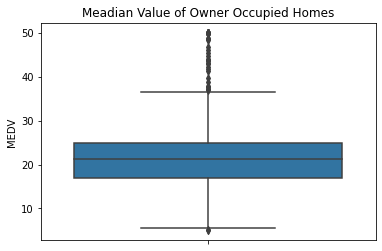

In [8]:
# Task 1 BoxPlot of Median value of owner-occupied homes

sns.boxplot( y=boston_df['MEDV'] )
plt.title('Meadian Value of Owner Occupied Homes')
plt.show()


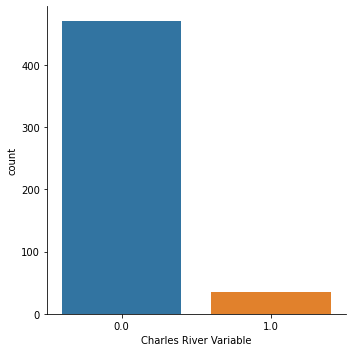

In [10]:
# Task 2 Bar Plot for the Charles River Variable  
# Think they want a count of each value of the variable
# so use catplot not barplot

sns.catplot(x='CHAS', kind='count', data=boston_df)
plt.xlabel("Charles River Dummy Variable");



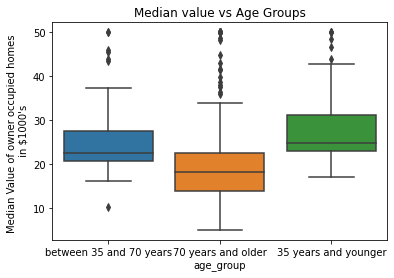

In [21]:
# Task 3  Provide a boxplot for the MEDV variable vs the AGE variable. 
#(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

# Repeat what they did with the ratings dataset 

boston_df.loc[(boston_df.AGE <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[((boston_df.AGE > 35)&(boston_df.AGE < 70)), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df.AGE >= 70), 'age_group'] = '70 years and older'

ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df)
plt.title("Median value vs Age Groups")
plt.ylabel("Median Value of owner occupied homes \n in $1000's");

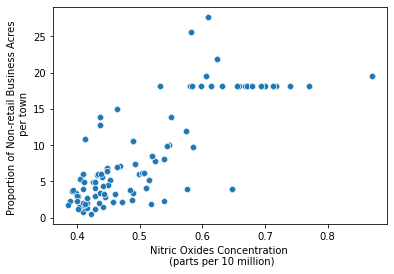

In [23]:
# Task 4 Provide a scatter plot to show the relationship between Nitric oxide concentrations 
# and the proportion of non-retail business acres per town. 


ax = sns.scatterplot(y='INDUS', x='NOX', data=boston_df)
plt.xlabel("Nitric Oxides Concentration \n(parts per 10 million)")
plt.ylabel("Proportion of Non-retail Business Acres \n per town");

What can you say about the relationship?

There is a positive relationship between the variables between concentrations of 0.4 and about 0.6 
but for concentrations above that it seems to flatten out.

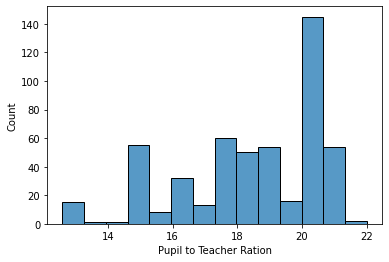

In [18]:
# Task 5 Create a histogram for the pupil to teacher ratio variable

sns.histplot(data=boston_df, x="PTRATIO")
plt.ylabel("Count");
plt.xlabel("Pupil to Teacher Ration");

**Questions to be answered**

1 Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

3  Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

4 What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

* State your hypothesis.
* Use α = 0.05
* Perform the test Statistics.
* State the conclusion from the test.





In [ ]:
**Question 1**
Is there a significant difference in median value of houses bounded by the Charles river or not?

Null Hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in the median value of houses bounded by Charles river and not bounded.")
    
Alternate Hypothesis    
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in the median value of houses bounded by Charles river and not bounded.)


*   Use α = 0.05

In [28]:
scipy.stats.ttest_ind(boston_df[boston_df.CHAS == 1].MEDV,
                     boston_df[boston_df.CHAS == 0].MEDV)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Since the p-value is less than 0.05, we reject the null hypothesis that there is no difference in the median value of houses bounded by Charles river and not bounded

In [ ]:
** Question 2**
Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

Null Hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).")
    
Alternate Hypothesis    
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)."")


*   Use α = 0.05

In [ ]:
boston_df.loc[(boston_df.AGE > 81), 'age_span'] = 'before 1940'
boston_df.loc[(boston_df.AGE <= 81), 'age_span'] = 'after 1940'

In [ ]:
**Conclusion:** Since the p-value is greater than 0.05, we fail to reject the null hypothesis that there is a statistical difference in median values of houses for each proportion of owner occupied units built prior to 1940.

In [ ]:
**Conclusion:** Since the p-value is greater than 0.05, we fail to reject the null hypothesis that there is a statistical difference in median values of houses for each proportion of owner occupied units built prior to 1940.

In [ ]:
### Question 3
Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

**Stating Hypothesis:**
-    Null Hypothesis: There is no relationship between Nitric Oxide concentration and proportion of non-retail business acres per town.
-    Alternative Hypothesis: There is a relationship between Nitric Oxide concentration and proportion of non-retail business acres per town.

**Setting alpha to 0.05**

In [ ]:
scipy.stats.pearsonr(boston_df.NOX, boston_df.INDUS)

In [ ]:
**Conclusion:** Since the p-value is greater than 0.05, we can reject the null hypothesis that there is no relationship between the nitric acid concentration and the proportion of non-retail business acres per town.

And as the r value is positive and close to zero, we can conclude that there is a almost strong relationship between these two variables and the relationship curve will be positively sloping.

In [ ]:
### Question 4
What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [ ]:
X = boston_df['DIS']

y = boston_df['MEDV']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

In [ ]:
**Conclusion:** There is an additional impact of **1.0916** of weighted distance  to the five Boston employment centres on the median value of owner occupied homes.